## Para calcular el área bajo la curva (datos de invierno):

In [1]:
import pandas as pd
import os
import numpy as np
from scipy.interpolate import interp1d
import math
import matplotlib.pyplot as plt
import pprint

In [2]:
os.getcwd()

'/datos/Practica_final_equipos'

### Generamos el DataFrame con los datos por segundo:

In [3]:
data_segundos_inv = pd.read_csv("Invierno_4.csv")

In [4]:
data_segundos_inv.head()

,Hora,Demanda,Unnamed: 2,Unnamed: 3,03OCC .CR-CARGA AREA .AV
0,08-ene-19 00:00:00,7284.051758,NaN,NaN,1/8/19 0:00
1,08-ene-19 00:00:02,7287.105957,NaN,NaN,1/9/19 0:00
2,08-ene-19 00:00:04,7292.275391,NaN,NaN,2 s
3,08-ene-19 00:00:06,7294.792969,NaN,NaN,NaN
4,08-ene-19 00:00:08,7298.662109,NaN,NaN,NaN


In [5]:
seg = np.linspace(0, 86400, 43201)
print(seg)

[0.0000e+00 2.0000e+00 4.0000e+00 ... 8.6396e+04 8.6398e+04 8.6400e+04]


In [6]:
len(seg)

43201

In [7]:
a_seg = np.array(seg)
print(a_seg)

[0.0000e+00 2.0000e+00 4.0000e+00 ... 8.6396e+04 8.6398e+04 8.6400e+04]


In [11]:
data_seg_inv = pd.DataFrame(seg, columns = ["Segundo"]) 
data_seg_inv

,Segundo
0,0.0
1,2.0
2,4.0
3,6.0
4,8.0
...,...
43196,86392.0
43197,86394.0
43198,86396.0
43199,86398.0


In [12]:
DEM_INV = pd.DataFrame(data_segundos_inv.Demanda, columns = ["Demanda"])
DEM_INV

,Demanda
0,7284.051758
1,7287.105957
2,7292.275391
3,7294.792969
4,7298.662109
...,...
43196,7284.542969
43197,7279.739258
43198,7277.975098
43199,7284.878906


Así se ve el DataFrame al final:

In [13]:
data_seg_inv["Demanda"] = DEM_INV["Demanda"]
data_seg_inv

,Segundo,Demanda
0,0.0,7284.051758
1,2.0,7287.105957
2,4.0,7292.275391
3,6.0,7294.792969
4,8.0,7298.662109
...,...,...
43196,86392.0,7284.542969
43197,86394.0,7279.739258
43198,86396.0,7277.975098
43199,86398.0,7284.878906


#### Calculando área bajo la curva usando trapz:

In [14]:
dem_trapz_inv = np.trapz(data_seg_inv.Demanda, data_seg_inv.Segundo)
print(f"{dem_trapz_inv:,.2f}")

680,048,317.46


#### Calculando área bajo la curva usando promedio de altura mínima y máxima:

In [15]:
dem_inv = data_seg_inv["Demanda"]
dem_max_inv = dem_inv.max()
dem_min_inv = dem_inv.min()
print("Max: ", f"{dem_max_inv:,.2f}")
print("Min: ", f"{dem_min_inv:,.2f}")

Max:  8,783.64
Min:  6,600.70


In [16]:
dem_prom_inv = ((dem_max_inv+dem_min_inv)/2)*86400
print(f"{dem_prom_inv:,.2f}")

664,603,270.31


#### Diferencia en porcentajes de datos de 1 día de invierno, usando trapz y considerando promedio de mínimo y máximo:

In [22]:
dif_inv = dem_trapz_inv - dem_prom_inv
dif_pc_inv = dif_inv*100/dem_trapz_inv
print("El cálculo cada 2 segundos arroja un área", f"{dif_pc_inv:,.2f}", "% mayor, que considerando el promedio del mínimo y máximo diario.")

El cálculo cada 2 segundos arroja un área 2.27 % mayor, que considerando el promedio del mínimo y máximo diario.


### Graficando:

In [23]:
#Puntos para graficar:
x_values_inv = [0,24]
y_max_inv = [dem_max_inv, dem_max_inv]
y_min_inv = [dem_min_inv, dem_min_inv]
y_prom_inv = [(dem_max_inv+dem_min_inv)/2, (dem_max_inv+dem_min_inv)/2]

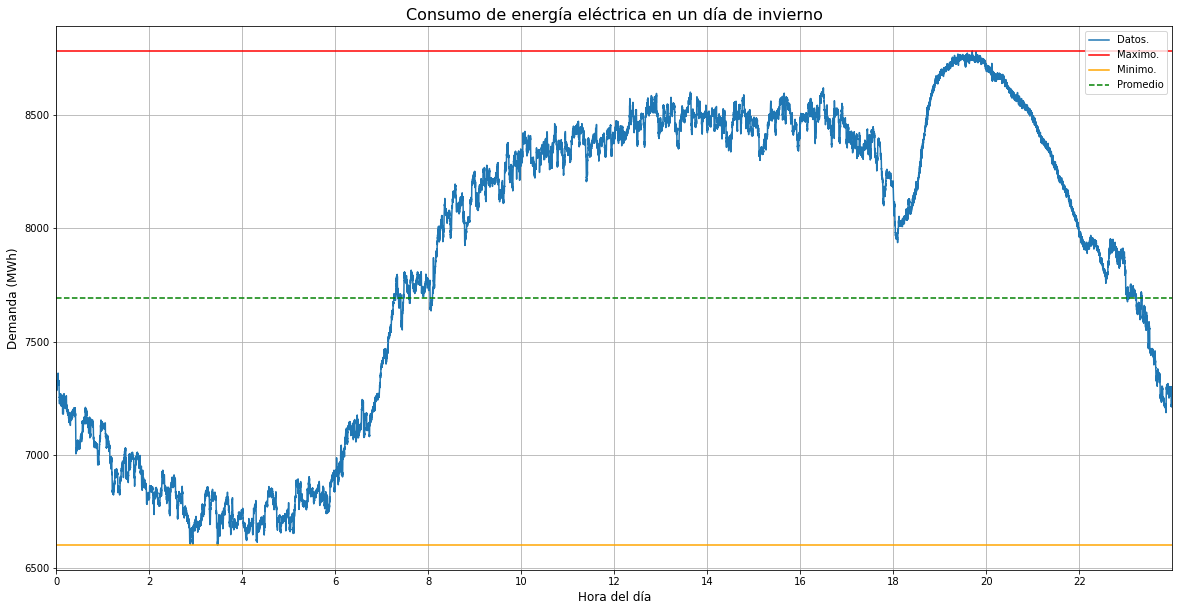

In [24]:
fig = plt.figure(figsize=(20,10))
plt.plot((data_seg_inv.Segundo/3600), data_seg_inv.Demanda)
plt.title("Consumo de energía eléctrica en un día de invierno", fontsize = 16)
plt.xlim(0, 24)
plt.xticks(np.arange(0, 24, step=2))
plt.xlabel('Hora del día', fontsize = 12)
plt.ylabel('Demanda (MWh)', fontsize= 12)
plt.plot(x_values_inv,y_max_inv, color = "red")
plt.plot(x_values_inv,y_min_inv, color = "orange")
plt.plot(x_values_inv,y_prom_inv, "g--")
plt.legend(['Datos.','Maximo.',"Minimo.","Promedio"], loc=1)
plt.grid(True)
plt.show()